# Predições de Vendas das Lojas Rossmann

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos

# **1. Contexto**

- Reunião Mensal de Resultados com os Gerentes de Loja
- CFO pediu uma Previsão de Vendas das Próximas 6 semanas de cada Loja

# 2. **Desafio**

# Problema
- Definicação do Budget para a reforma das Lojas

# Causas
- A Previsão de Vendas Atual apresenta muita divergência
- O processo de predição de Vendas é empírico, e não científico.
- Toda Previsão de Vendas é feita manualmente pelas 1.115 lojas da Rossmann.
- A Visualização das Vendas é limitada ao Computador

# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas
- Visualização das Predições de Vendas poderão ser feitas pelo Smartphone

# **3. Desenvolvimento da Solução**

# Descrição dos Dados

In [7]:
print('Número de Linhas: {}' .format(df1.shape[0]))
print('Número de Colunas: {}' .format(df1.shape[1]))

Número de Linhas: 1017209
Número de Colunas: 18


## Estatísticas Descritivas

In [34]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
                  
# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index(0)
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## Mapa Mental de Hipóteses

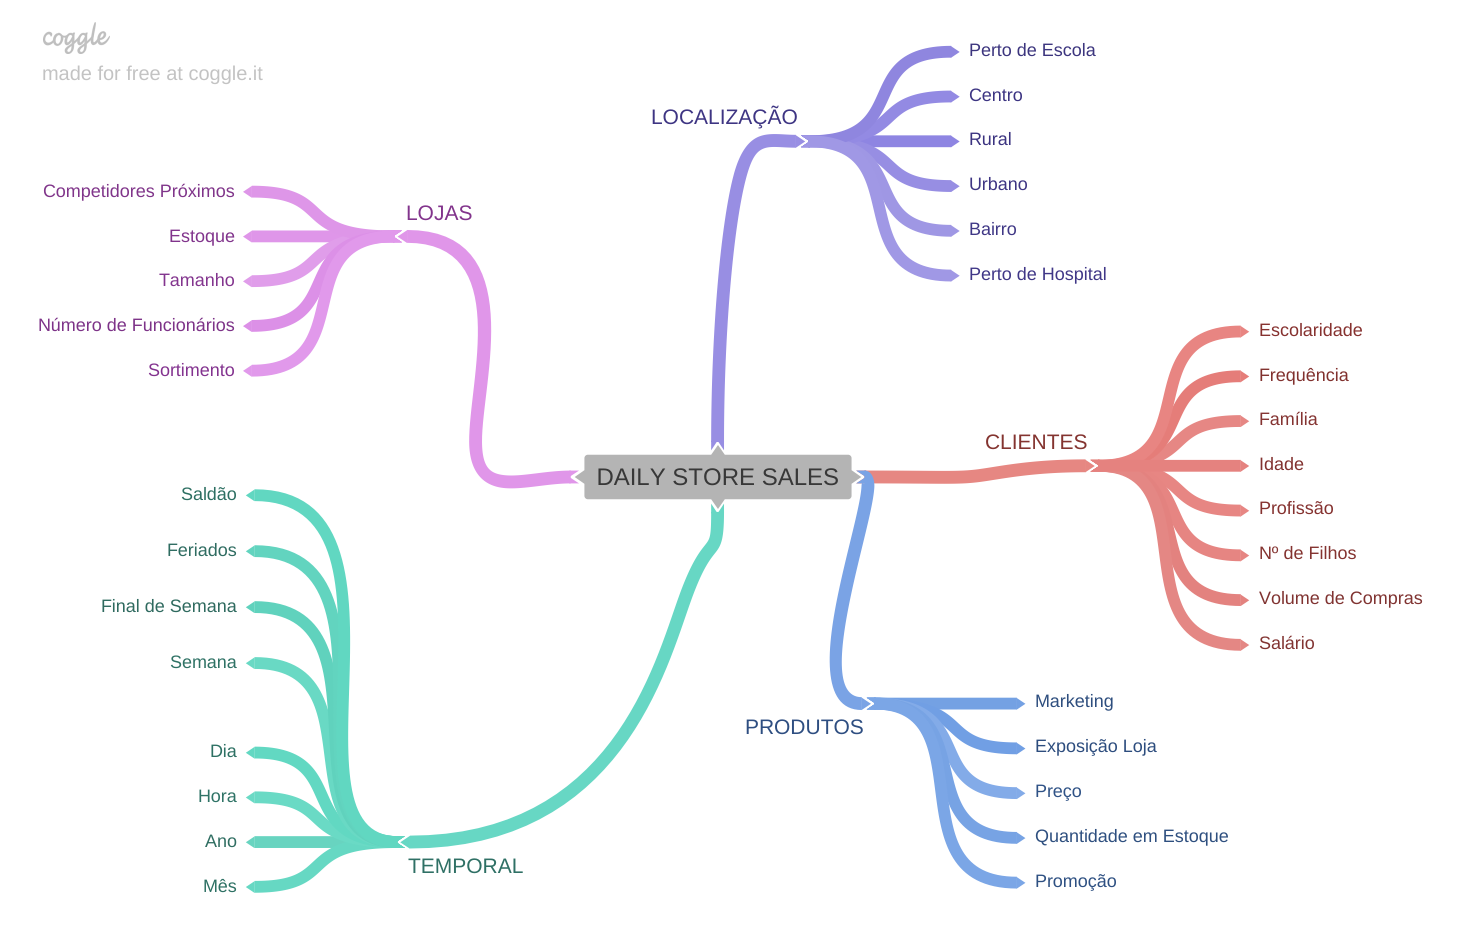

In [43]:
Image('img/mind_map_hypothesis.png')

## Hipóteses da Análise Exploratória

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores há mais tempo deveriam vender mais. 

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos nos finais de semana. (wtf, tá maluco? é o contrário kkkkk)

**12.** Lojas deveriam vender menos durante os feriados escolares.

# Análise Exploratória dos Dados

### Variável Resposta

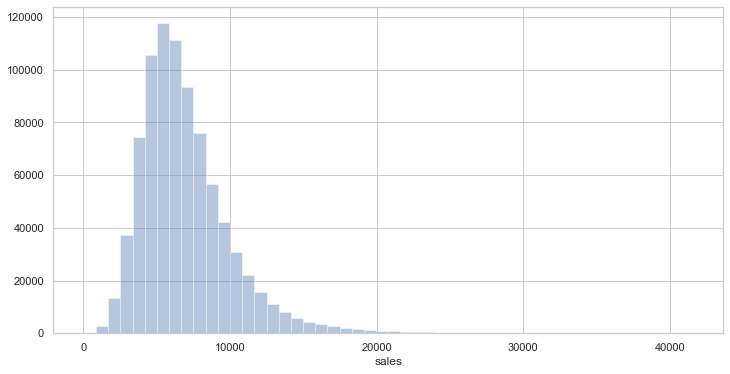

In [56]:
#sns.distplot(df4['sales'])
sns.distplot(df4['sales'], kde=False)
#sns.distplot(np.log1p(df4['sales']))

### Variáveis Numéricas

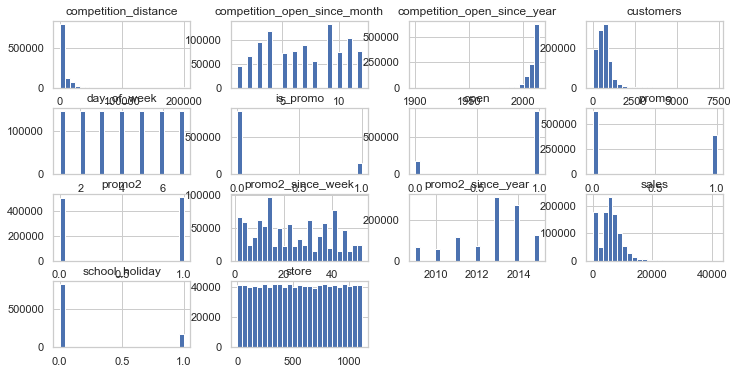

In [57]:
#plt.figure(figsize=(24, 12))   NÃO FUNCIONA PORQUE NÃO USEI PLT OU SNS NA FIGURA
num_attributes.hist(bins=25);

# day of week praticamente não tem variação, então provavelmente ela sozinha quase não tem informaçõo relevante para o modelo
# isso só faz sentido se a altura dos gráficos fossem as SALES como Meigarom fala, não?

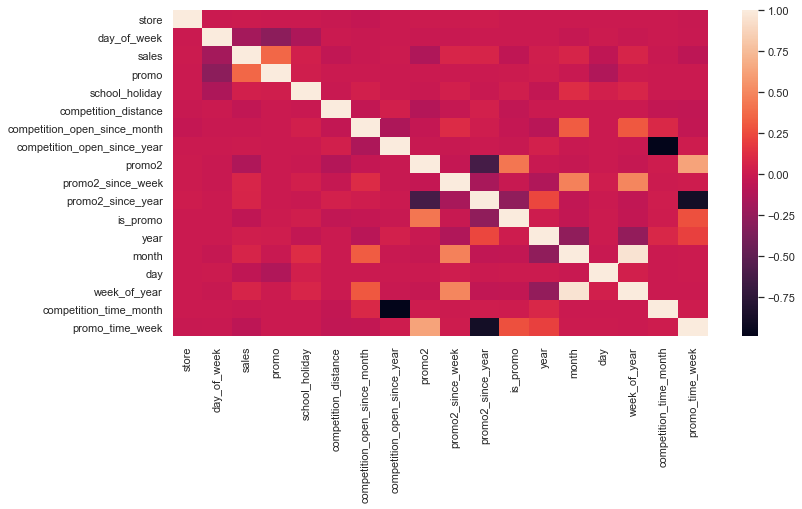

In [60]:
sns.heatmap(correlacao)

###  Categorical Variables

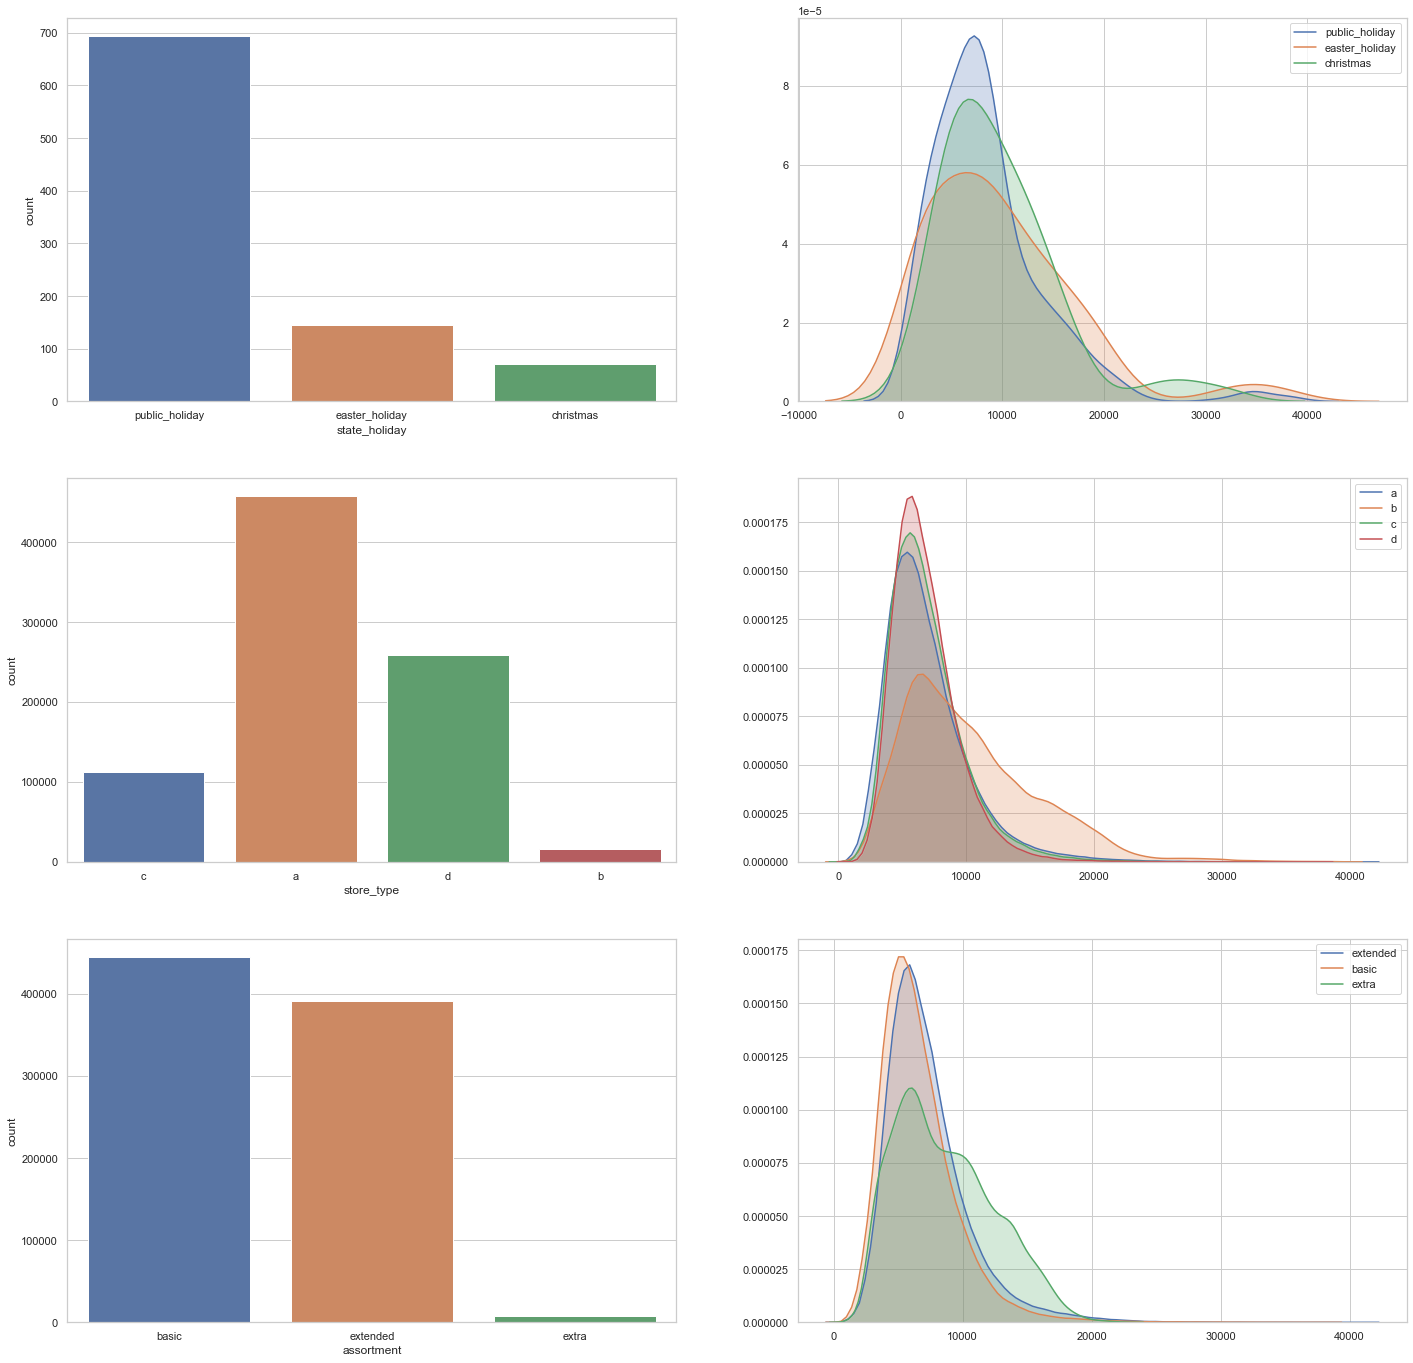

In [62]:
plt.figure(figsize=(24,24))
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

# state_holiday
plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']  # a maioria dos dias são regular day, então distorcia o gráfico
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True )

# as outras duas são variaveis auxiliares que utilizamos para derivar outras

In [63]:
print(f"Extra Sales Mean: {df4[df4['assortment'] == 'extra']['sales'].mean()}")
print(f"Extra Sales Mean: {df4[df4['assortment'] == 'extended']['sales'].mean()}")
print(f"Extra Sales Mean: {df4[df4['assortment'] == 'basic']['sales'].mean()}")

Extra Sales Mean: 8642.503593616762
Extra Sales Mean: 7300.843546647447
Extra Sales Mean: 6621.523057038494


## Validação das Hipóteses --- COLOCAR OS GRÁFICOS NUMA SÓ FIGURA, COM SUBPLOTS

### **Hipótese 2.** Lojas com competidores mais próximos deveriam vender menos.
- ***Falso***. Nós pensamos que com mais concorrência, haverão menos vendas, mas é possível que onde haja mais concorrentes próximos, a área é mais populosa e possui mais clientes no geral.
- Lojas com competidores MAIS PRÓXIMOS vendem MAIS.

In [70]:
# agrupar as distancias para poder fazer um gráfico útil
# aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

# plt.subplot( 1, 3, 1 )
# sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

# plt.subplot( 1, 3, 2 )
# bins = list( np.arange( 0, 20000, 1000) )
# aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
# aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
# sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
# plt.xticks( rotation=90 );

# plt.subplot( 1, 3, 3 )
# x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

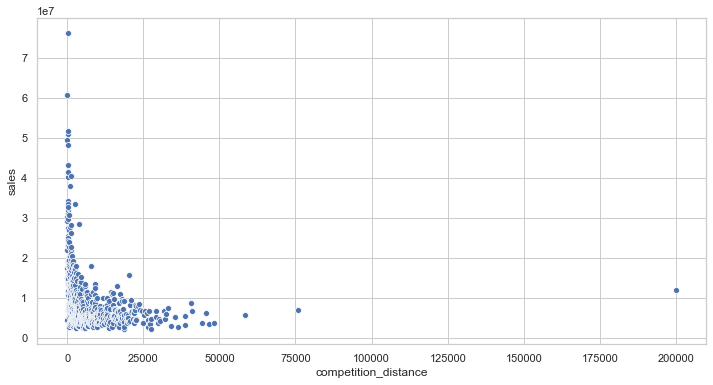

In [71]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).mean().reset_index()
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

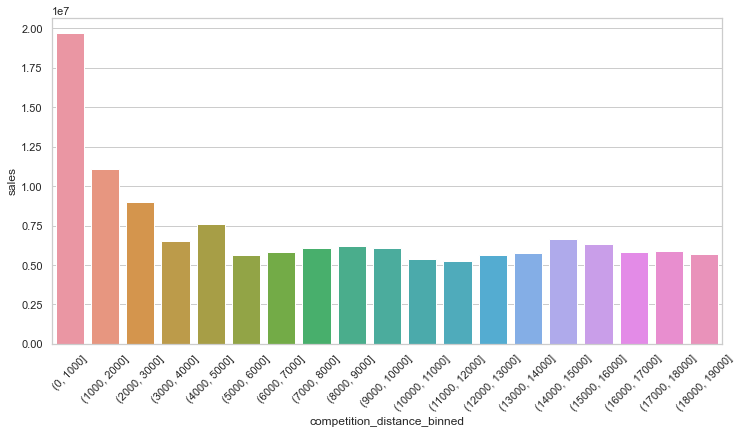

In [72]:
# porque os valores vão só até 19000? tentei mudar o range dos bins, mas dá erro
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).mean().reset_index() # meigarom usou .sum(), mas acho que mean faz mais sentido
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=45);

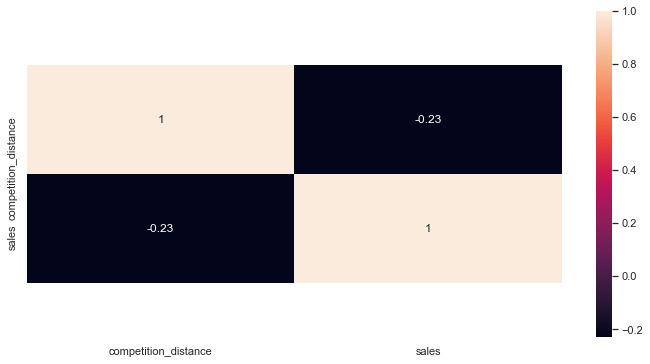

In [73]:
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

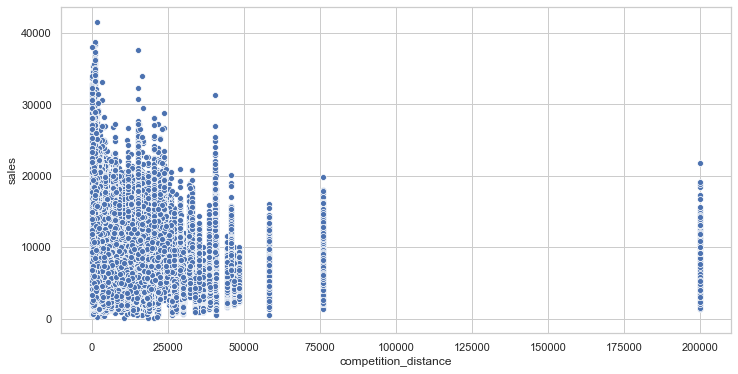

In [74]:
# foi o gráfico que pensei antes de ver a solução de meigarom, aparenta ter uma leve relação linear negativa, mas pode ser resultado de ter mais lojas com distancias pequenas - 
# além disso, a partir de uma certa distância, e comparando com os dados preenchidos com distancia = 200mil, nao aparenta variar muito.
sns.scatterplot(data=df4, x='competition_distance', y='sales');
# até porque scatter plots são bons quando os dados são muito granulados, feito esses
# mas é melhor o gráfico de dispersão que eu fiz, ou com GROUPBY feito meigarom fez?

### **Hipótese 9.** Lojas deveriam vender mais no segundo semestre do ano.
- Falso, as vendas são bem similares ao longo dos meses do ano, com exceção de Dezembro, que realmente possui um valor volume de vendas (embora não haja os dados do ano 2015)
- O comportamento da média das vendas parecem cíclico, primeiro cresce, depois descresce, e no fim do ano cresce novamente. O regplot mostra bem isso.

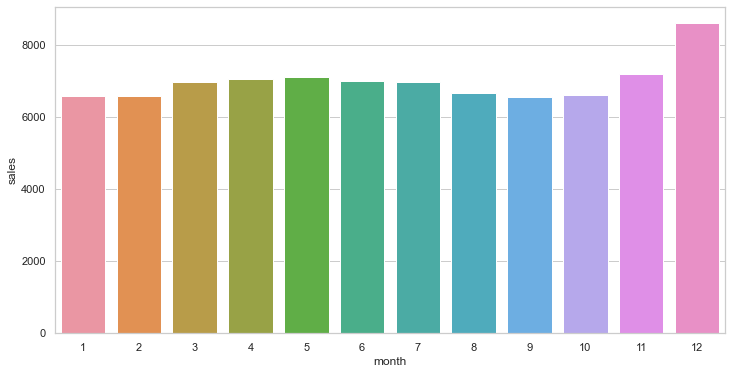

In [88]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).mean().reset_index()
sns.barplot( x='month', y='sales', data=aux1 );

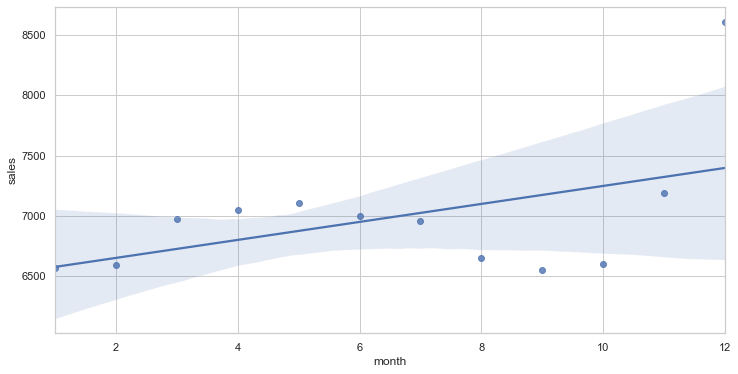

In [89]:
plt.figure(figsize=(12,6))
sns.regplot( x='month', y='sales', data=aux1 );

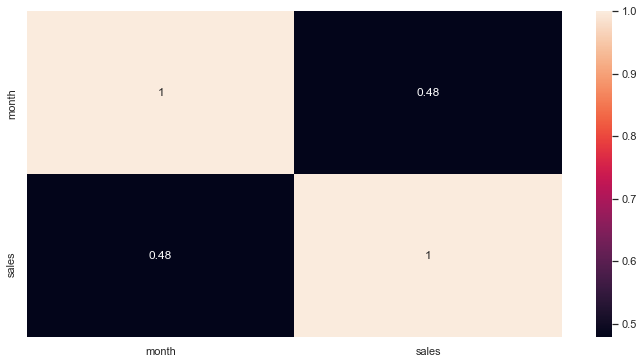

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **Hipótese 10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
- Falso. Há novamente um comportamento cíclico, assim como nos meses. Há um decréscimo, seguido de um aumento das vendas, outra queda, e assim por diante...
- Analisando isoladamente, percebemos que em média, há mais vendas nos 10 primeiros dias do mês do que no restante.

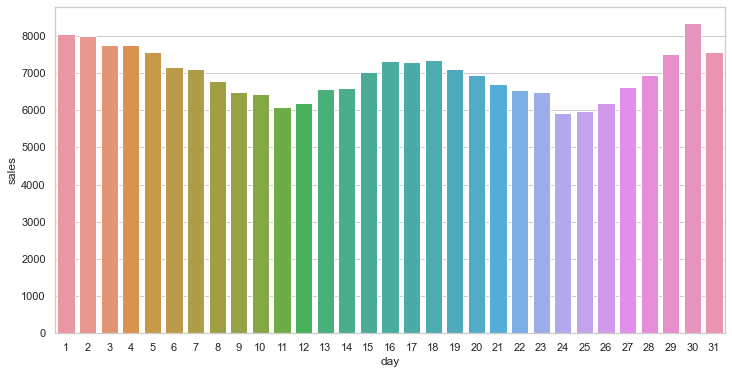

In [91]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).mean().reset_index()
sns.barplot( x='day', y='sales', data=aux1 );

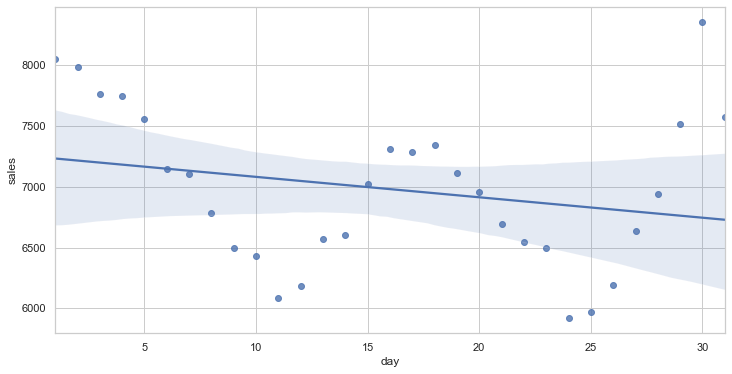

In [92]:
plt.figure(figsize=(12,6))
sns.regplot( x='day', y='sales', data=aux1 );

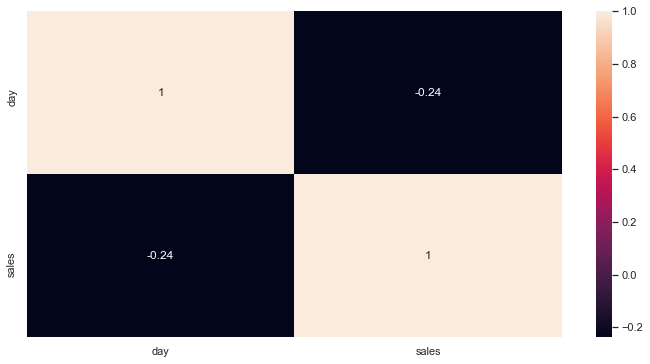

In [93]:
plt.figure(figsize=(12,6))
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

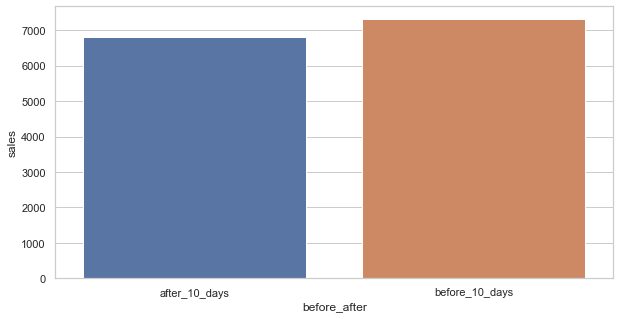

In [94]:
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'sales']].groupby( 'before_after' ).mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot( x='before_after', y='sales', data=aux2 );

In [95]:
# realmente precisava de um gráfico pra isso? wtf
# a maioria das coisas dessas hipóteses acho que só uma média simples bastaria, eu hein. Mas as vezes é importante vê o comportamento ao longo do tempo mesmo.
aux2

,before_after,sales
0,after_10_days,6824.773314
1,before_10_days,7307.762933


### **Hipótese 11.** Lojas deveriam vender menos nos finais de semana. (wtf, tá maluco? é o contrário kkkkk)
- Aparentemente, as lojas abrem pouco aos domingos, ou apenas algumas delas abrem. Entretanto, a média de venda aos domingos aparente ser a mais alta. Em contrapartida, as vendas no sábado são menores do que qualquer outro dia da semana.
- Portanto, a conclusão de que eu chego é de que esta hipótese é inconclusiva.
- Ou então, podemos mudá-la para: AS LOJAS VENDEM MENOS AOS SÁBADOS.

Text(0.5, 1.0, 'Média de Vendas nos Dias da Semana')

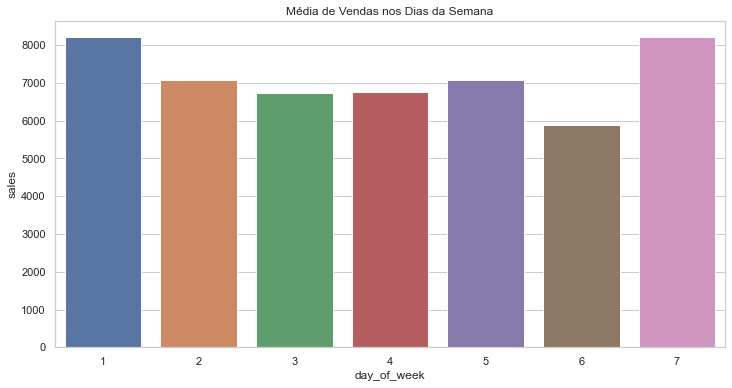

In [96]:
aux1 = df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).mean().reset_index()

sns.barplot( x='day_of_week', y='sales', data=aux1 );
plt.title('Média de Vendas nos Dias da Semana')

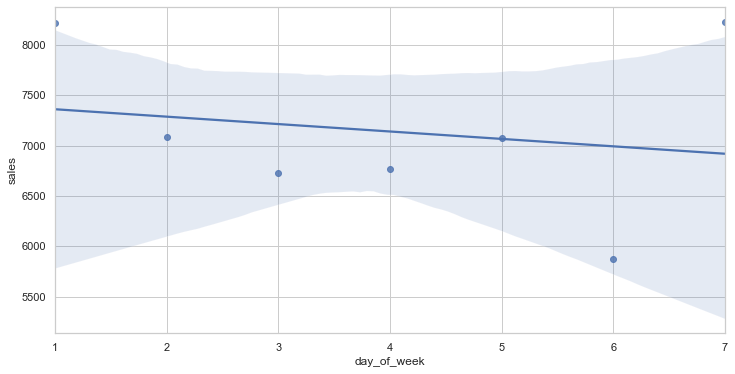

In [100]:
sns.regplot( x='day_of_week', y='sales', data=aux1 );

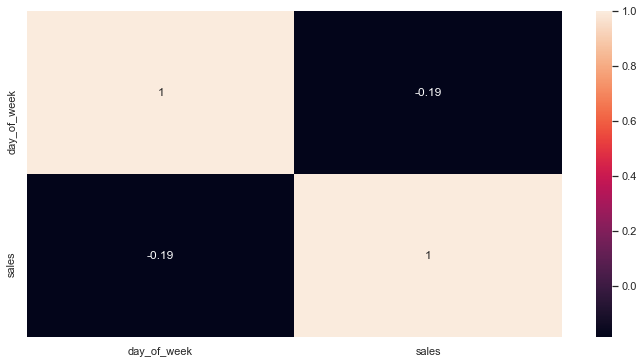

In [101]:
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **Hipótese 12.** Lojas deveriam vender menos durante os feriados escolares.
- Falso. As lojas vendem MAIS durante os feriados escolares. Analisando mês a mês, o único mês no qual se vende MENOS nos feriados escolares é em Dezembro.

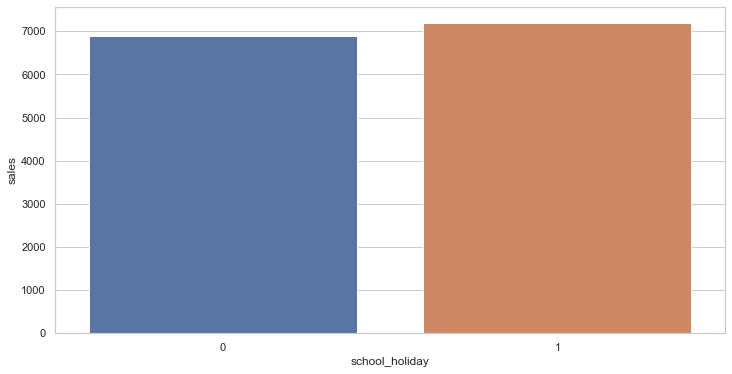

In [102]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).mean().reset_index()

sns.barplot( x='school_holiday', y='sales', data=aux1 );

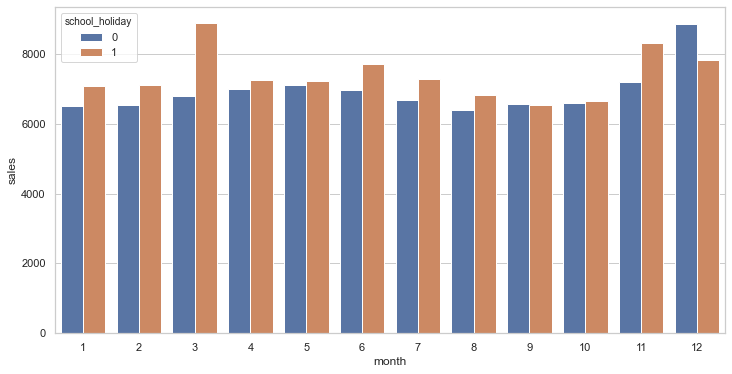

In [103]:
aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month','school_holiday'] ).mean().reset_index()

sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );

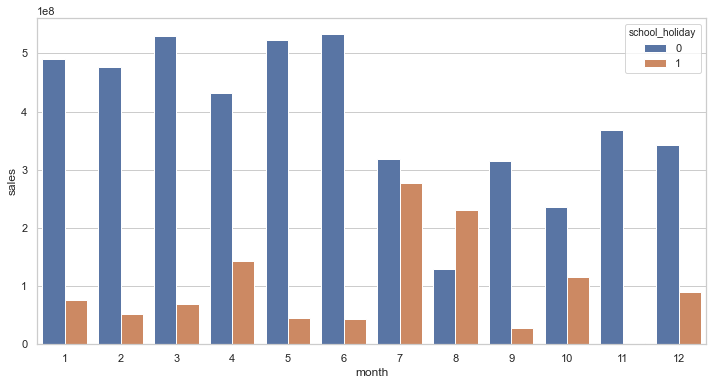

In [104]:
# O total de vendas nos períodos escolares é grande em julho e agosto, pois é a época de férias escolares nos EUA.
aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month','school_holiday'] ).sum().reset_index()

sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );

### Resumo das Hipóteses 

In [105]:
from tabulate import tabulate

In [106]:
tab =[['Hipoteses', 'Conclusao', 'Relevante', 'Correlação'],
      ['H1', 'Verdadeira', 'Sim', 'Baixa'],  
      ['H2', 'Falsa', 'Sim', 'Baixa'],  
      ['H3', 'Falsa', 'Não', 'Média'],
      ['H4', 'Falsa', 'Não', 'Baixa'],
      ['H5', '-', '-'],
      ['H6', 'Falsa', 'Não', 'Baixa'],
      ['H7', 'Verdadeira', 'Sim', 'Alta'],
      ['H8', 'Verdadeira', 'Sim', 'Alta'],
      ['H9', 'Falsa', 'Sim', 'Média'],      
      ['H10', 'Falsa', 'Sim', 'Baixa'],
      ['H11', 'Verdadeira', 'Sim', 'Baixa'],
      ['H12', 'Falsa', 'Sim', 'Média'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevante    Correlação
-----------  -----------  -----------  ------------
H1           Verdadeira   Sim          Baixa
H2           Falsa        Sim          Baixa
H3           Falsa        Não          Média
H4           Falsa        Não          Baixa
H5           -            -
H6           Falsa        Não          Baixa
H7           Verdadeira   Sim          Alta
H8           Verdadeira   Sim          Alta
H9           Falsa        Sim          Média
H10          Falsa        Sim          Baixa
H11          Verdadeira   Sim          Baixa
H12          Falsa        Sim          Média


## Análise Multivariada

### Atributos Numéricos

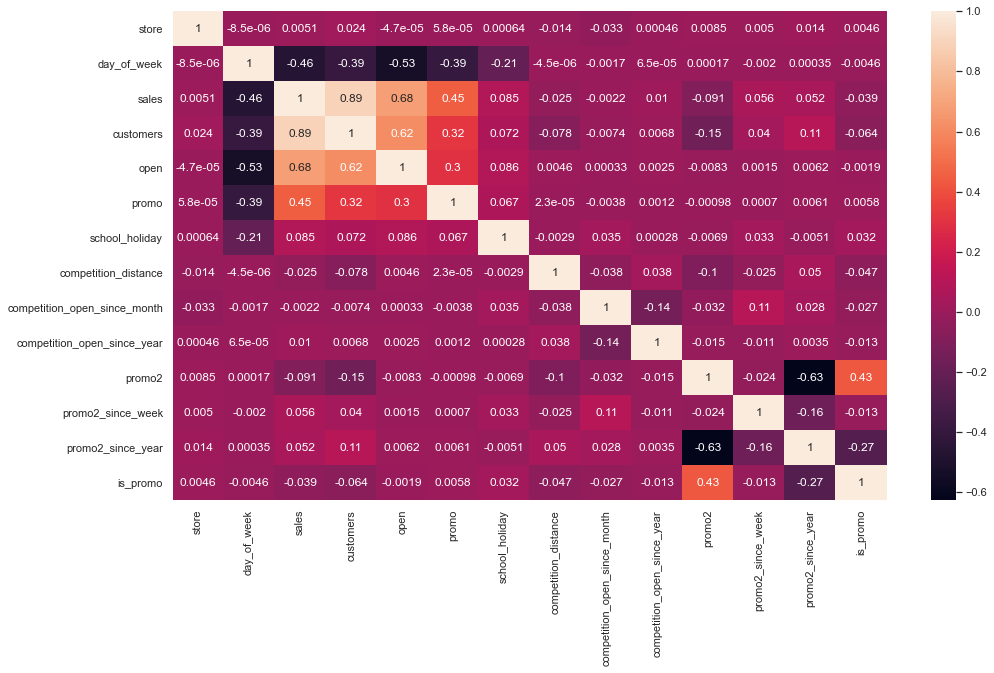

In [107]:
correlation = num_attributes.corr(method='pearson')
plt.figure(figsize=(16, 9))
sns.heatmap(correlation, annot=True);

### Atributos Categóricos

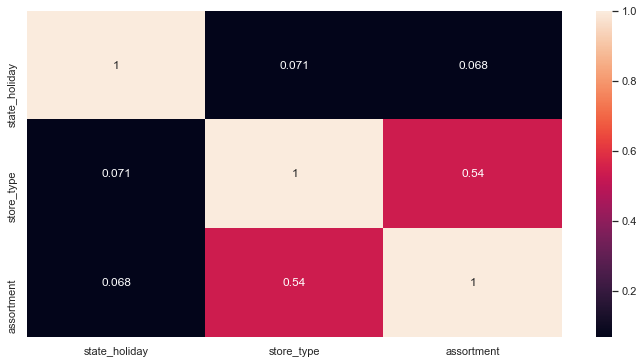

In [116]:
sns.heatmap(d, annot=True);

# Machine Learning Modelling

## Compare Model's Performance

In [153]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result_cv.sort_values( 'RMSE CV' )

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,836.61 +/- 217.1,0.12 +/- 0.02,1254.3 +/- 316.17
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2088.88 +/- 327.01,0.3 +/- 0.01,2988.6 +/- 499.57
0,XGBoost Regressor,5159.64 +/- 480.56,0.67 +/- 0.01,5891.75 +/- 590.67


Estes resultados implicam que o fenômeno estudado (previsão de vendas) é complexo, e portanto, modelos mais simples (como os lineares) não funcionam bem para este problema.

# 8.0 Hyperparameter Fine Tuning

## 8.4 Final Model

In [160]:
param_tuned = {
    'n_estimators': 3000,
    'eta': 0.03,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3 
        }

# **4. Conclusão & Demonstração**

# Tradução e Interpretação do Erro

## 9.1 Business Performance --- POR ALGUM MOTIVO, AS CÉLULAS DAQUI NÃO FICARAM SALVAS/RODADAS... TEM GRÁFICOS E TABELA IMPORTANTES

In [ ]:
# O quanto de receita vai entrar no meu modelo?
df9_sum = df9[['store', 'predictions']].groupby('store').sum().reset_index()
df9_mean = df9[['store', 'predictions']].groupby('store').mean().reset_index()

# MAE and MAPE
df9_aux1 = df9[['store', 'sales', 'predictions']].groupby('store').apply( lambda x: mean_absolute_error( x['sales'], x['predictions'] )).reset_index().rename(columns={0: 'MAE'})
df9_aux2 = df9[['store', 'sales', 'predictions']].groupby('store').apply( lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] )).reset_index().rename(columns={0: 'MAPE'})

# Merge
df9_aux3 = pd.merge(df9_aux1, df9_aux2, how='inner', on='store')
df9_aux4 = pd.merge(df9_mean, df9_aux3, how='inner', on='store')
df92 = pd.merge(df9_sum, df9_aux4, how='inner', on='store').rename(columns={'predictions_x': 'sum_predictions', 'predictions_y': 'mean_predictions'})

# Scenarios
df92['daily_worst_scenario'] = df92['mean_predictions'] - df92['MAE']
df92['daily_best_scenario'] = df92['mean_predictions'] + df92['MAE']

df92['6_week_worst_scenario'] = df92['sum_predictions'] - df92['MAPE'] * df92['sum_predictions']
df92['6_week_best_scenario'] = df92['sum_predictions'] + df92['MAPE'] * df92['sum_predictions']
# sum predictions é a soma das vendas previstas para as próximas 6 semanas de cada loja

In [1]:
df92.head()

NameError: name 'df92' is not defined

In [ ]:
# lojas difíceis de lidar com as previsões, erro percentual muito alto!!!
df92.sort_values('MAPE', ascending=False).head()

In [ ]:
sns.scatterplot(x='store', y='MAPE', data=df92)

Realmente, existem lojas mais desafiadoras do que as outras, mas no geral estão em torno de um MAPE de 10%

## 9.2 Total Performance

In [ ]:
df93 = df92[['sum_predictions', '6_week_worst_scenario', '6_week_best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
df93['Values'] = df93['Values'].map( 'R$ {:,.2f}'.format )
df93

## 9.3 Machine Learning Performance

In [ ]:
df9.loc[:, 'error'] = df9.loc[:, 'sales'] - df9.loc[:, 'predictions']
df9.loc[:, 'error_rate'] = df9.loc[:, 'predictions'] / df9.loc[:, 'sales']

In [ ]:
# By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.
sns.lineplot( x='date', y='sales', data=df9, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )

In [ ]:
sns.lineplot( x='date', y='error_rate', data=df9 )
plt.axhline( 1, linestyle='--')

In [ ]:
sns.distplot( df9['error'] )
# o erro segue uma distribuição normal, é um bom sinal de que não há viés e coisa do tipo (estudar análise de resíduos)

In [ ]:
sns.scatterplot( df9['predictions'], df9['error'] )
# tirando alguns outliers de previsões entre 6mil e  9mil, o modelo possui um erro bem constante e aleatório, sem muitos outliers, o que também é um bom sinal

# **5. Próximos Passos**

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Usabilidade
- Reduzir em 10% o erro do Modelo

# **Q & A**

# *Muito Obrigado!*